# USED CARS PRICE PREDICTION

## PROCEDURE FOLLOWED

- 1. Statement of the given problem
- 2. Business Understanding
- 3. Data analysis&Exploration
- 4. Data Cleaning
- 5. Data Visualization
- 6. Model Building
- 7. Model EValuation

### 1.PROBLEM STATEMENT

- AIM: To predict the price of used cars based on the previous data.

### 2. Business Solutions & Understanding
- Companies can restrict the selling price of used car being posted by customer in their respective websites.
- Companies can provide a visualization to customers for better understanding of their car selling price.
- Companies can have Fraud Customers who are posting the cars for higher prices.
- Companies can expand its network based on the amount of cars being sold the next year by prediction.

### 3.DATA ANALYSIS&EXPLORATION

In [2]:
#Importing Libraries
import warnings #To avoid warnings based on versions updating
warnings.filterwarnings('ignore')
import numpy as np #For numerical analysis
import pandas as pd #For reading data stored in various file formats
import matplotlib.pyplot as plt  #For visualizations
import seaborn as sns #For Special Visualizations and insights.
%matplotlib inline

In [13]:
# Let's open the training Data excel file
df = pd.read_excel("Data_Train.xlsx")
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


#### ->PRAMETERS INSIGHT

| Parameter | Description  |
| --- | --- |
|Name | The brand and model of the car |
|Location| The location in which the car is being sold or is available for purchase|
|Year| The year or edition of the model|
|Kilometers_Driven |The total kilometres driven in the car by the previous owner(s) in KM|
|Fuel_Type |The type of fuel used by the car|
|Transmission |The type of transmission used by the car|
|Owner_Type| Whether the ownership is Firsthand, Second hand or other|
|Mileage| The standard mileage offered by the car company in kmpl or km/kg|
|Engine| The displacement volume of the engine in cc|
|Power |The maximum power of the engine in bhp|
|Seats| The number of seats in the car|
|New_Price| The price of a new car of the same model|
|Price |The price of the used car in INR Lakhs|

In [8]:
#Information of Data
print("*"*50)
print(df.info())
print("*"*50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB
None
**************************************************


- only few columns are of with integer and float

In [9]:
# Checking Null Values
print("*"*50)
print(df.isnull().sum())
print("*"*50)

**************************************************
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
**************************************************


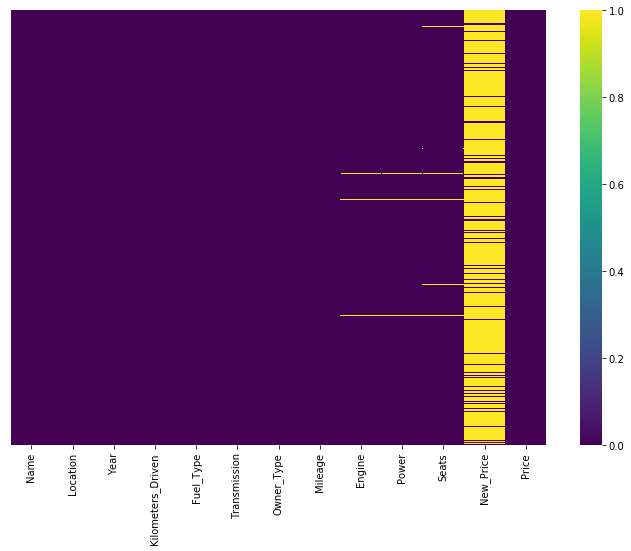

In [10]:
#Visualizing missing values using Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

- above plot gives us clear intution that we NEW_PRICE values are missings,so we will remove that column.
- other missing values can be replaced using some values in that particular column.

### 4.DATA CLEANING

- NOTE:we are using only training data.

In [14]:
# Dropping New_Price column from training data...for test data which we will remove later
df.drop(labels=['New_Price'], axis=1, inplace=True)

In [15]:
# Drop the NA Values from Training Data
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [18]:
df['Name'][:10]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
5        Hyundai EON LPG Era Plus Option
6                 Nissan Micra Diesel XV
7      Toyota Innova Crysta 2.8 GX AT 8S
8    Volkswagen Vento Diesel Comfortline
9         Tata Indica Vista Quadrajet LS
Name: Name, dtype: object

- After having clear look over the above result in each row...name of the car company followed by model name of the specified car

In [19]:
# Lets clean the data so that we can store company name and Model name of car in a seperate column
df['Brand'] = df['Name'].apply(lambda x: x.split(" ")[0])
df['Model_Name'] = df['Name'].apply(lambda x: " ".join(x.split(" ")[1:]))

# Drop the Name column after adding the columns
df.drop(labels=['Name'], axis=1, inplace=True)

In [20]:
df.columns

Index(['index', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model_Name'],
      dtype='object')

In [21]:
df = df[['Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
         'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [22]:
# Column ------> Mileage
df['Mileage'][:5]

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [23]:
# Column ------> engine
df['Engine'][:5]

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: Engine, dtype: object

In [25]:
# Column ------> power
df['Power'][:5]

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

In [26]:
# Extract the numerical from the object data using split commands in both training data
df['Mileage'] = df['Mileage'].apply(lambda x: str(x.split(" ")[0]))
df['Engine'] = df['Engine'].apply(lambda x: str(x.split(" ")[0]))
df['Power'] = df['Power'].apply(lambda x: str(x.split(" ")[0]))

In [28]:
#let print newly transformed data form
df.head(10)

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
5,Hyundai,EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814,55.2,5.0,2.35
6,Nissan,Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50
7,Toyota,Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.0,17.50
8,Volkswagen,Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.6,5.0,5.20
9,Tata,Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3,1248,74,5.0,1.95


In [30]:
df.shape

(5975, 13)

- while having meticulous glance on the given train data for the power column some of them are placed as null values
- so we have to select rows which not null

In [31]:
df = df[df['Power'] != 'null']

In [32]:
df.shape

(5872, 13)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 13 columns):
Brand                5872 non-null object
Model_Name           5872 non-null object
Location             5872 non-null object
Year                 5872 non-null int64
Kilometers_Driven    5872 non-null int64
Fuel_Type            5872 non-null object
Transmission         5872 non-null object
Owner_Type           5872 non-null object
Mileage              5872 non-null object
Engine               5872 non-null object
Power                5872 non-null object
Seats                5872 non-null float64
Price                5872 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 642.2+ KB


- if we observe above information MILEAGE,ENGINE,POWER there are class object which actually can be int/float

In [35]:
# Extract the numerical from the object data using split commands in both training data
df['Mileage'] = df['Mileage'].apply(lambda x: float(x))
df['Engine'] = df['Engine'].apply(lambda x: float(x))
df['Power'] = df['Power'].apply(lambda x: float(x))

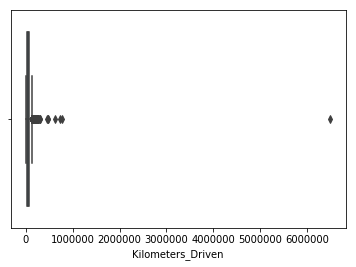

In [36]:
sns.boxplot(df['Kilometers_Driven'])

- some outliers are present ...from above max data resides with in 3lakhs

In [38]:
# Clean the top outliers
for i in np.arange(50):
    index = df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

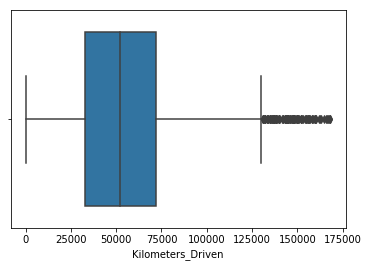

In [39]:
sns.boxplot(df['Kilometers_Driven'])

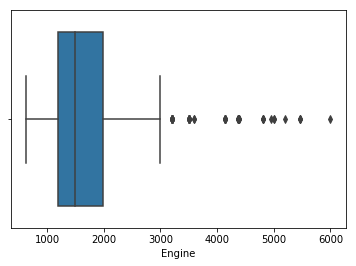

In [40]:
sns.boxplot(df['Engine'])

In [41]:
# Clean the top outliers
for i in np.arange(7):
    index = df[df['Engine'] == df['Engine'].max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

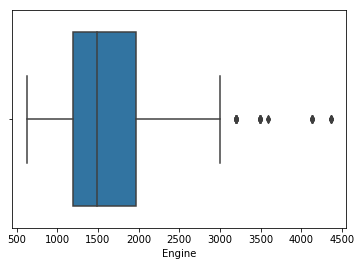

In [42]:
sns.boxplot(df['Engine'])

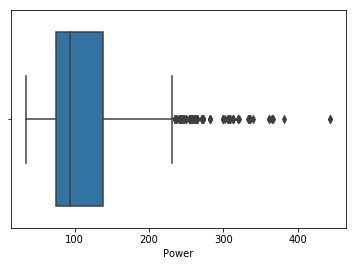

In [43]:
sns.boxplot(df['Power'])

In [44]:
# Clean the top outliers
for i in np.arange(25):
    index = df[df['Power'] == df['Power'].max()].index
    df.drop(index=index, inplace=True, axis=1)

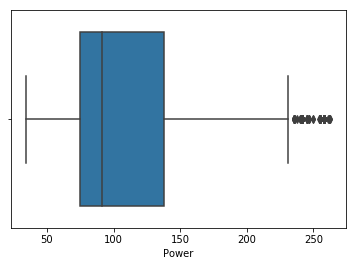

In [45]:
sns.boxplot(df['Power'])

### 5.DATA VISUALIZATION

In [47]:
df.head()

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [48]:
df.shape

(5713, 15)

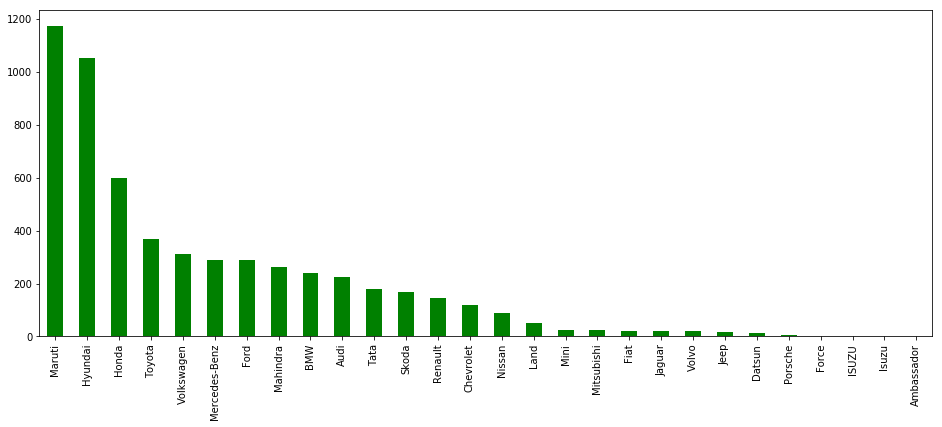

In [49]:
# Let us look at the top brands
plt.figure(figsize=(16,6))
pd.value_counts(df['Brand']).plot.bar(color='g')

- most cars are from MARUTHI,HYUNDAI,HONDA

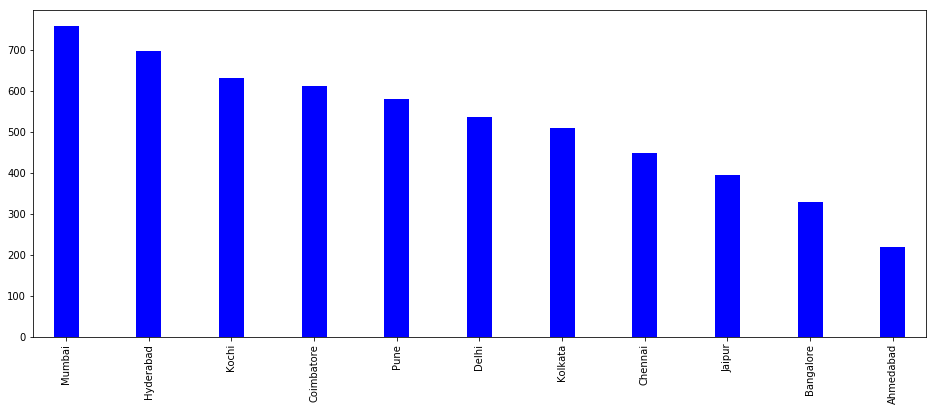

In [51]:
# Let us look at the location type
plt.figure(figsize=(16,6))
pd.value_counts(df['Location']).plot.bar(color='b', width=0.3)

- most cars are from MUMBAI,HYDERABAD,KOCHI

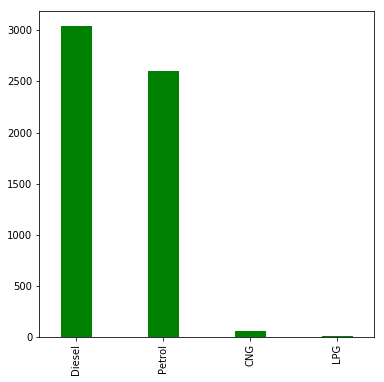

In [52]:
# Let us look at the fuel type
plt.figure(figsize=(6,6))
pd.value_counts(df['Fuel_Type']).plot.bar(color='g', width = 0.35)

- most cars are of DIESEL,PETROL

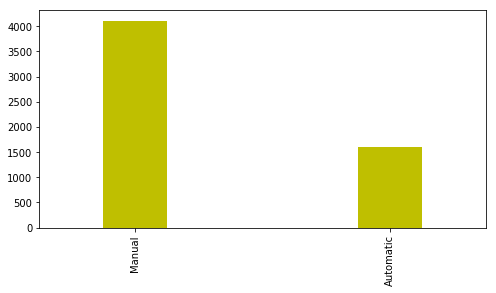

In [53]:
# Let us look at the transmission type
plt.figure(figsize=(8,4))
pd.value_counts(df['Transmission']).plot.bar(color='y', width = 0.25)

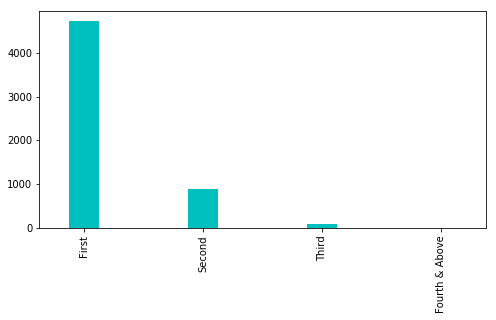

In [57]:
# Let us look at the owner type
plt.figure(figsize=(8,4))
pd.value_counts(df['Owner_Type']).plot.bar(color='c', width = 0.25)

- most cars are of first hand cars

In [58]:
df.drop(labels=['level_0'], axis=1, inplace=True)

In [59]:
df.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### 6.BUILDING MODEL

In [61]:
# Convert the categorical data info numerical categories for machine to understand using LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
encoder = LabelEncoder()

In [64]:
# Encode the categorical columns of training data
df['Brand'] = encoder.fit_transform(df['Brand'])
df['Model_Name'] = encoder.fit_transform(df['Model_Name'])
df['Location'] = encoder.fit_transform(df['Location'])
df['Owner_Type'] = encoder.fit_transform(df['Owner_Type'])
df['Fuel_Type'] = encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])

In [65]:
df.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,16,1525,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,9,431,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,8,856,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,16,581,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,1,83,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [66]:
df.shape

(5713, 14)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5713 entries, 0 to 5789
Data columns (total 14 columns):
index                5713 non-null int64
Brand                5713 non-null int32
Model_Name           5713 non-null int32
Location             5713 non-null int32
Year                 5713 non-null int64
Kilometers_Driven    5713 non-null int64
Fuel_Type            5713 non-null int32
Transmission         5713 non-null int32
Owner_Type           5713 non-null int32
Mileage              5713 non-null float64
Engine               5713 non-null float64
Power                5713 non-null float64
Seats                5713 non-null float64
Price                5713 non-null float64
dtypes: float64(5), int32(6), int64(3)
memory usage: 535.6 KB


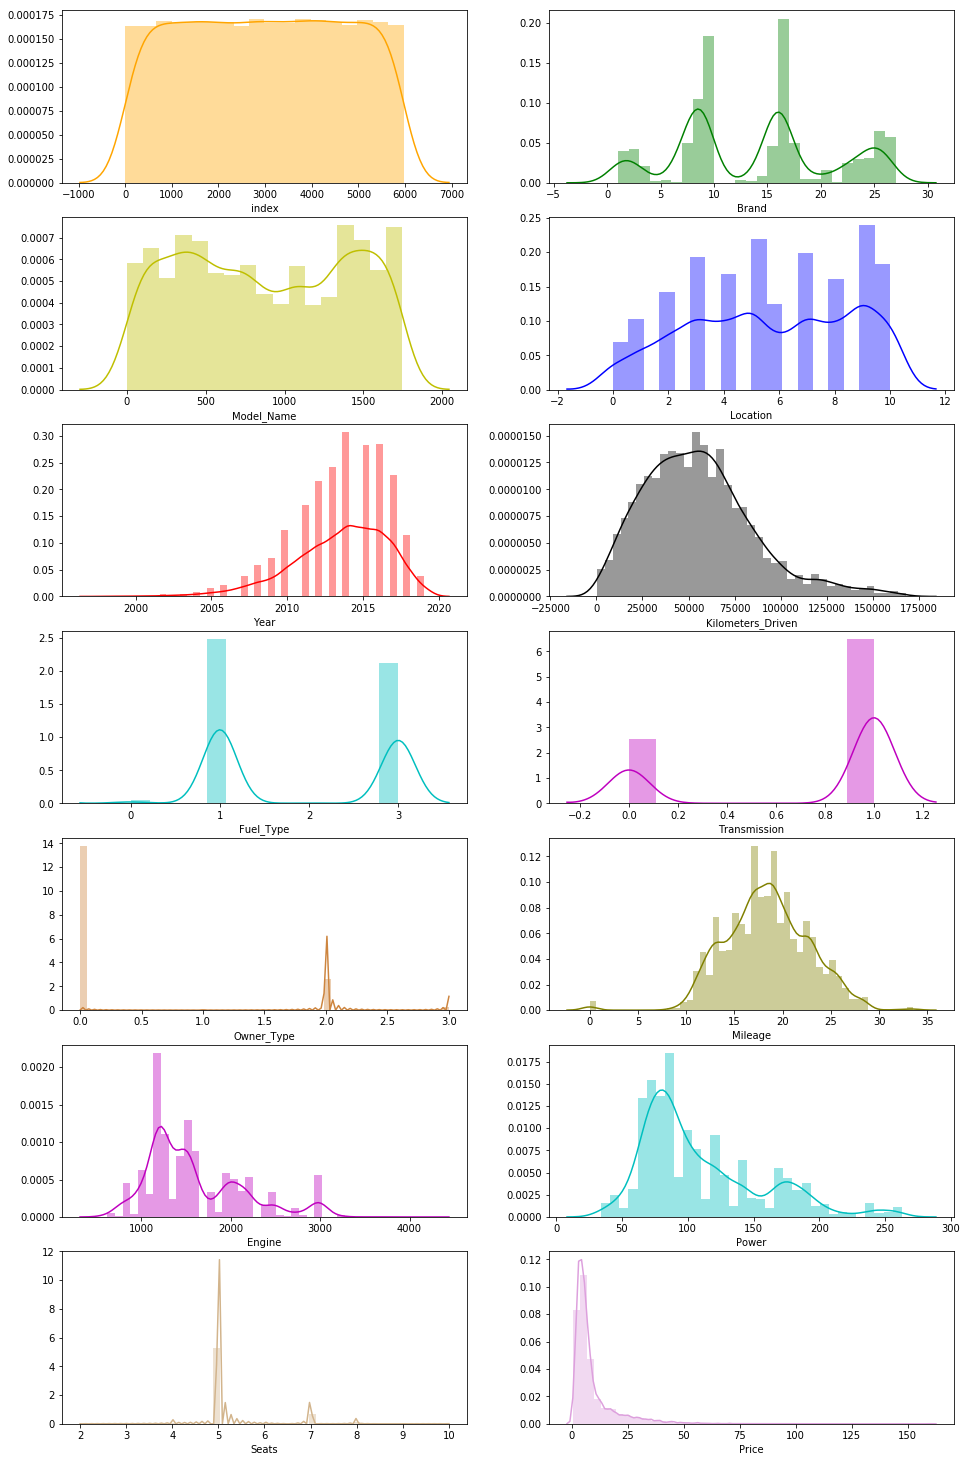

In [68]:
# Let us check the distribution graphs for our data
plt.figure(figsize=(16,26))
c = ['r','Orange','g','y','b','r','k','c','m', 'peru', 'olive', 'm', 'c', 'tan', 'plum']
for i in np.arange(1,15):
    plt.subplot(7,2,i)
    sns.distplot(df[df.columns[i-1]], color=c[i])

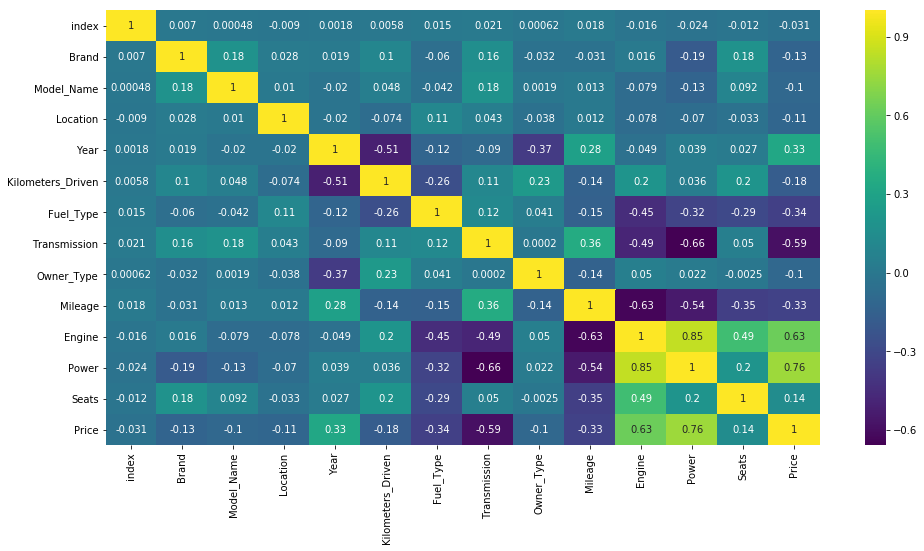

In [69]:
# Correlation between the data columns in training data
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

- from above plot price is dependent on year,engine,power

In [70]:
# Let us define the Dependent & Independent variables to train our model
X = df.drop(labels=['Price', 'Model_Name', 'Transmission'], axis=1)
# Dropping transmission because it is completely negatively corelated to price
y = df['Price']

In [71]:
X.columns

Index(['index', 'Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [72]:
X = X.iloc[:,1:]

In [73]:
X.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [74]:
# Scale the data to achieve accurate training results.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [76]:
model = RandomForestRegressor(n_estimators=100)

In [77]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
y_pred = model.predict(X_test)

In [79]:
print(y_pred)

[12.6608  5.8121 23.7902 ... 12.8303  4.4203 13.1771]


In [80]:
# R2_Score of our Model
r2_score(y_test, y_pred)

0.917966446709375

In [81]:
# Let us create an Accuracy function to define our model accuracy
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [82]:
score(y_test, y_pred)

0.9256185832673793

- saving model to predict price of the car  in future usuage

In [83]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'carmodel.pkl') 

['carmodel.pkl']

In [84]:
# Load the model from the file 
knn_from_joblib = joblib.load('carmodel.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 

array([12.6608,  5.8121, 23.7902, ..., 12.8303,  4.4203, 13.1771])

- model was saved succesfully